# Load Data

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import fbeta_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,PLY00001,P058048,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,...,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0
1,PLY00002,P037400,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,...,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,PLY00003,P001054,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,PLY00004,P062710,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,...,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,PLY00005,P068548,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,...,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99872 entries, 0 to 99871
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       99872 non-null  object 
 1   player_id                99872 non-null  object 
 2   kill_death_ratio         97521 non-null  float64
 3   headshot_percentage      84716 non-null  float64
 4   win_rate                 90015 non-null  float64
 5   accuracy_score           96848 non-null  float64
 6   kill_consistency         97281 non-null  float64
 7   reaction_time_ms         73815 non-null  float64
 8   account_age_days         81323 non-null  float64
 9   level                    75795 non-null  float64
 10  level_progression_speed  80614 non-null  float64
 11  friend_network_size      91713 non-null  float64
 12  reports_received         75722 non-null  float64
 13  device_changes_count     90774 non-null  float64
 14  input_consistency_scor

C:\Users\User\AppData\Local\Temp\ipykernel_15052\3500464809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_cheater', data=df, palette='viridis')


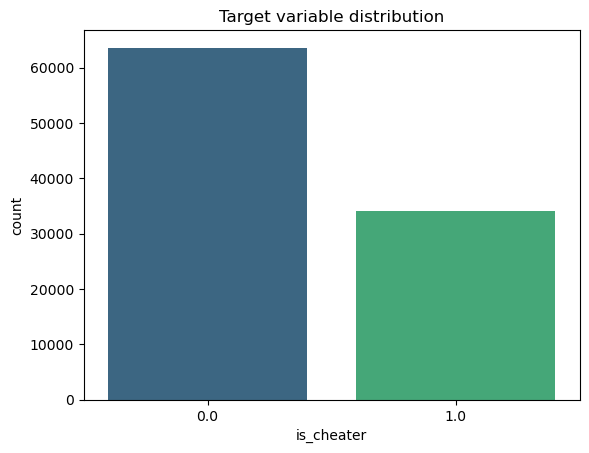

is_cheater
0.0    63619
1.0    34129
Name: count, dtype: int64


In [4]:
sns.countplot(x='is_cheater', data=df, palette='viridis')
plt.title('Target variable distribution')
plt.show()
print(df['is_cheater'].value_counts())

In [5]:
df.describe()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
count,97521.000000,84716.000000,90015.000000,96848.000000,97281.000000,73815.000000,81323.000000,75795.000000,80614.000000,91713.000000,...,84368.000000,92769.000000,93165.000000,74996.000000,97310.000000,83062.000000,88684.000000,97373.000000,93303.000000,97748.000000
mean,4.730992,47.862476,71.392377,40.136772,0.648417,135.095617,496.732778,62.834505,0.358055,138.040016,...,0.644913,0.595968,0.690491,0.339731,0.323232,66.212415,95.598928,0.579655,0.883145,0.349153
std,1.517649,13.809168,13.980314,12.132295,0.150941,51.168588,351.046370,20.713589,1.538594,84.928891,...,0.152952,0.156445,0.132566,0.138624,0.120221,24.287336,29.529363,0.173510,0.041532,0.476705
min,0.500000,5.000000,19.072048,8.000000,0.250000,55.000000,1.025164,25.000258,0.003612,0.000000,...,0.380002,0.235636,0.460000,0.100012,0.096278,8.414078,11.238571,0.280000,0.800002,0.000000
25%,3.707266,38.234664,61.712798,31.590962,0.543156,99.365908,158.319583,44.942872,0.040509,64.000000,...,0.512490,0.465125,0.576161,0.219427,0.219853,45.176432,70.545063,0.429521,0.848158,0.000000
50%,4.563780,47.136106,71.306532,39.582770,0.651803,128.520912,479.826280,62.886963,0.080959,136.000000,...,0.644465,0.588652,0.690222,0.339817,0.322364,66.206088,95.197261,0.579163,0.883225,0.000000
75%,5.535913,56.593599,81.002581,48.071852,0.756384,162.611524,763.609374,80.811109,0.210263,206.000000,...,0.778002,0.727212,0.805389,0.459482,0.424723,87.385053,120.543999,0.730082,0.918116,1.000000
max,12.000000,95.000000,100.000000,85.000000,0.980000,528.543010,1499.843118,99.999222,78.259728,349.000000,...,0.909999,0.879998,0.919991,0.579999,0.539995,107.999177,147.999111,0.879998,0.959998,1.000000


In [6]:
df_test.head()

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,ANS00001,P128393,4.807460,NaN,85.513445,40.885421,0.541166,206.216513,554.404426,26.449873,...,0.466226,0.407562,0.574111,NaN,0.239997,0.331286,39.167105,133.600242,0.854674,0.810149
1,ANS00002,P057262,4.478905,54.549192,66.998239,41.730924,0.866650,80.200970,718.385124,30.350951,...,0.850628,0.825845,0.717767,0.604164,0.258227,0.218852,84.855443,67.842696,0.408059,NaN
2,ANS00003,P063924,6.982952,37.740360,76.489177,46.397954,NaN,141.426624,525.868237,69.546770,...,0.444088,0.908123,0.538952,0.618745,0.407880,0.261211,98.825249,65.697213,0.285722,0.822645
3,ANS00004,P051190,5.003208,44.231043,69.877125,33.585034,0.959418,110.800568,1089.867093,41.780396,...,0.601710,0.445652,0.464034,0.865429,0.139233,0.127039,31.225586,139.140240,0.626042,0.959571
4,ANS00005,P023176,3.038168,NaN,NaN,29.467070,0.567550,84.594256,109.235604,83.159919,...,0.300572,0.534116,NaN,0.758842,0.346107,0.471993,NaN,48.957231,0.774780,0.872152


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25889 entries, 0 to 25888
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       25889 non-null  object 
 1   player_id                25889 non-null  object 
 2   kill_death_ratio         22986 non-null  float64
 3   headshot_percentage      23410 non-null  float64
 4   win_rate                 22689 non-null  float64
 5   accuracy_score           24820 non-null  float64
 6   kill_consistency         22718 non-null  float64
 7   reaction_time_ms         25063 non-null  float64
 8   account_age_days         23526 non-null  float64
 9   level                    23289 non-null  float64
 10  level_progression_speed  24215 non-null  float64
 11  friend_network_size      22635 non-null  float64
 12  reports_received         23165 non-null  float64
 13  device_changes_count     24697 non-null  float64
 14  input_consistency_scor

In [8]:
df_test.describe()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
count,22986.000000,23410.000000,22689.000000,24820.000000,22718.000000,25063.000000,23526.000000,23289.000000,24215.000000,22635.000000,...,22494.000000,23171.000000,23324.000000,23753.000000,24993.000000,23877.000000,22564.000000,23209.000000,24774.000000,24883.000000
mean,4.728468,47.852241,71.473334,40.113886,0.648088,135.474745,495.412970,62.788975,0.362697,137.891937,...,0.549945,0.645363,0.596936,0.689081,0.338769,0.323508,65.820134,95.854653,0.582140,0.883121
std,1.502735,13.732677,13.896802,12.041830,0.150855,51.552762,352.033632,20.847679,1.566146,84.969345,...,0.190137,0.153624,0.155202,0.132457,0.138098,0.119748,24.199734,29.437406,0.173164,0.041464
min,0.709480,5.000000,20.903529,8.000000,0.250000,55.000000,1.072321,25.000685,0.003809,0.000000,...,0.220016,0.380004,0.236147,0.460049,0.100042,0.096339,9.107595,12.850997,0.280003,0.800008
25%,3.707807,38.284510,61.904366,31.859935,0.541894,99.542847,155.615505,44.725895,0.040395,63.000000,...,0.384125,0.512985,0.467599,0.574953,0.219963,0.221420,44.968115,70.878024,0.433550,0.848242
50%,4.568382,46.959567,71.320933,39.536876,0.652219,128.743629,480.514555,62.610645,0.081298,136.000000,...,0.551159,0.646249,0.589990,0.688512,0.337610,0.322602,65.432348,95.634914,0.584013,0.883319
75%,5.522146,56.690023,81.011126,47.884746,0.756940,162.780391,763.169746,80.947961,0.215776,207.000000,...,0.713425,0.779899,0.726384,0.804369,0.458080,0.424579,86.820992,120.547259,0.732943,0.918111
max,12.000000,95.000000,100.000000,85.000000,0.980000,591.033113,1499.890576,99.994229,65.086194,349.000000,...,0.879996,0.909920,0.879988,0.919978,0.579996,0.539994,107.989489,147.999848,0.879988,0.959991


# Data Wrangling

In [9]:
df = df.dropna(subset=['is_cheater'])

feature_cols = df.columns.drop(['id', 'player_id', 'is_cheater'])
X = df[feature_cols]
y = df['is_cheater']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [12]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=feature_cols)
X_val_imputed = pd.DataFrame(X_val_imputed, columns=feature_cols)

# Modeling

In [13]:
# Calculate scale_pos_weight: (Count of Class 0 / Count of Class 1)
neg_count = y_train.value_counts()[0.0]
pos_count = y_train.value_counts()[1.0]
scale_pos_weight = neg_count / pos_count

print(f"Scale Pos Weight: {scale_pos_weight:.4f}")

Scale Pos Weight: 1.8641


In [14]:
lgbm = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    n_estimators=400,
    learning_rate=0.01,
    scale_pos_weight=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

lgbm.fit(
    X_train_imputed,
    y_train,
    eval_set=[(X_val_imputed, y_val)],
    eval_metric='binary_logloss',
)

y_val_pred = lgbm.predict(X_val_imputed)

[LightGBM] [Info] Number of positive: 27303, number of negative: 50895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7438
[LightGBM] [Info] Number of data points in the train set: 78198, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


# Model Evaluation

In [15]:
def macro_f2_score(y_true, y_pred):
    # Fbeta_score for beta=2
    f2_class_0 = fbeta_score(y_true, y_pred, beta=2, pos_label=0)
    f2_class_1 = fbeta_score(y_true, y_pred, beta=2, pos_label=1)

    # Macro-average
    return (f2_class_0 + f2_class_1) / 2

In [16]:
# Calculate Macro-averaged F2 Score
f2_macro = macro_f2_score(y_val, y_val_pred)
precision_macro = (precision_score(y_val, y_val_pred, pos_label=0) + precision_score(y_val, y_val_pred, pos_label=1)) / 2
recall_macro = (recall_score(y_val, y_val_pred, pos_label=0) + recall_score(y_val, y_val_pred, pos_label=1)) / 2

# F2 score on positive class (Class 1 - Cheater)
f2_cheater = fbeta_score(y_val, y_val_pred, beta=2, pos_label=1)
recall_cheater = recall_score(y_val, y_val_pred, pos_label=1)
precision_cheater = precision_score(y_val, y_val_pred, pos_label=1)

print("\n--- Validation Results ---")
print(f"Macro-averaged F2 Score: {f2_macro:.4f}")
print(f"Macro-averaged Precision: {precision_macro:.4f}")
print(f"Macro-averaged Recall: {recall_macro:.4f}")
print(f"\nCheater (Positive Class, 1.0) Performance:")
print(f"Recall: {recall_cheater:.4f}")
print(f"Precision: {precision_cheater:.4f}")
print(f"F2 Score: {f2_cheater:.4f}")


--- Validation Results ---
Macro-averaged F2 Score: 0.7295
Macro-averaged Precision: 0.7611
Macro-averaged Recall: 0.7697

Cheater (Positive Class, 1.0) Performance:
Recall: 0.9748
Precision: 0.5457
F2 Score: 0.8423


# Create Submission

In [17]:
X_test = df_test[feature_cols]
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=feature_cols)
test_predictions = lgbm.predict(X_test_imputed)

In [ ]:
df_submission = pd.DataFrame({
    'id': df_test['id'],
    'task1': test_predictions.astype(int)
})

In [ ]:
output_file = 'task1.csv'
df_submission.to_csv(output_file, index=False)

print(f"\nPredictions saved to {output_file} ({len(df_submission)} entries)")


Predictions saved to task1.csv (25889 entries)
